In [ ]:
!pip install pandas==1.5.3

In [ ]:
import pandas as pd

### **Group by**
- Groupby는  DataFrameGroupBy 형식으로 반환

#### **Groupby - basic**

In [ ]:
# data from:
ipl_data = {
    'Team':['Riders','Riders','Devils','Devils','Kings','Kings','Kings','Kings','Riders','Royals','Royals','Riders'],
    'Rank':[1,2,2,3,3,4,1,1,2,3,1,2],
    'Year':[2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
    'Points':[876,789,863,673,741,812,756,788,694,701,804,690],
}

df = pd.DataFrame(ipl_data)

In [ ]:
df.groupby('Team')['Points'].mean()

Team
Devils    768.00
Kings     774.25
Riders    762.25
Royals    752.50
Name: Points, dtype: float64

#### **Hierarchical index**
- 2개 이상으로 이루어진 index를 말함

In [ ]:
# index1 = Team, index2 = Year
h_index = df.groupby(['Team', 'Year'])['Points'].sum()
h_index

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2015    812
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
Name: Points, dtype: int64

#### **unstack**
- Groupby로 묶인 데이터를 matrix형태로 풀어줌

In [ ]:
# stack()을 쓰면 다시 Series들을
# multilevel index를 가진 Series나 DataFrame으로 묶어줌
h_index.unstack()

Year,2014,2015,2016,2017
Team,,,,
Devils,863.0,673.0,NaN,NaN
Kings,741.0,812.0,756.0,788.0
Riders,876.0,789.0,694.0,690.0
Royals,701.0,804.0,NaN,NaN


In [ ]:
# reset_index: 맨 앞의 index(Team)을 없애고 원래대로 풀어줌
h_index.reset_index().head()

,Team,Year,Points
0,Devils,2014,863
1,Devils,2015,673
2,Kings,2014,741
3,Kings,2015,812
4,Kings,2016,756


#### **swaplevel, sort_index**
- swaplevel(): index의 level을 바꾸는 함수
- sort_index(level): 지정한 index level을 기준으로 sorting

In [ ]:
#h_index 자체가 바뀌는 건 아님
h_index.swaplevel().head()

Year  Team  
2014  Devils    863
2015  Devils    673
2014  Kings     741
2015  Kings     812
2016  Kings     756
Name: Points, dtype: int64

In [ ]:
#sort_index
h_index.sort_index(level=0)#level0인 Team을 기준으로 sorting

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2015    812
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
Name: Points, dtype: int64

In [ ]:
# sort_values()
# value값(Points)를 기준으로 오름차순 정렬
h_index.sort_values()

Team    Year
Devils  2015    673
Riders  2017    690
        2016    694
Royals  2014    701
Kings   2014    741
        2016    756
        2017    788
Riders  2015    789
Royals  2015    804
Kings   2015    812
Devils  2014    863
Riders  2014    876
Name: Points, dtype: int64

#### **Hierarchical index operation**
- index level을 기준으로 기본 연산 수행 가능
- pandas 버전 2.0에서는 level 인자가 없음! downgrade해야 함

In [ ]:
# 지금 h_index의 type은 Series
h_index.sum(level=0)

<ipython-input-5-04efe6ed9183>:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  h_index.sum(level=0)


Team
Devils    1536
Kings     3097
Riders    3049
Royals    1505
Name: Points, dtype: int64

#### **Groupby - grouped**
- groupby에 의해 Split된 상태(그룹 별로 나눠진 상태)의 값들을 추출
- grouped 객체는 generator 형태로 반환됨
- 튜플 형태로 그룹의 key(그룹 이름), value(그룹에 포함된 데이터)이 추출됨.

In [ ]:
grouped = df.groupby('Team')

In [ ]:
# 여기서 group은 DataFrame 형태임.
for name, group in grouped:
    print(name)
    print(group)

Devils
     Team  Rank  Year  Points
2  Devils     2  2014     863
3  Devils     3  2015     673
Kings
    Team  Rank  Year  Points
4  Kings     3  2014     741
5  Kings     4  2015     812
6  Kings     1  2016     756
7  Kings     1  2017     788
Riders
      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
8   Riders     2  2016     694
11  Riders     2  2017     690
Royals
      Team  Rank  Year  Points
9   Royals     3  2014     701
10  Royals     1  2015     804


In [ ]:
# get_group(): grouped된 객체의 특정 그룹에 속한 값들을 가져올 때 사용
grouped.get_group('Devils')

,Team,Rank,Year,Points
2,Devils,2,2014,863
3,Devils,3,2015,673


### **Groupby - apply**
1. **Aggregation**
    - 요약된 통계 정보를 추출해 줌
        - sum(), mean() 등
2. **Transformation**
    - 해당 정보를 변환해 줌
        - lambda 사용
3. **Filtration**
    - 특정 정보를 제거하여 보여주는 필터링 기능

#### **1. Aggregation**

In [ ]:
grouped.agg(sum) # sum 함수가 apply할 함수
                 # 그룹별로 max함수가 각 column에 적용

,Rank,Year,Points
Team,,,
Devils,5,4029,1536
Kings,9,8062,3097
Riders,7,8062,3049
Royals,4,4029,1505


In [ ]:
import numpy as np

grouped.agg(np.mean)

,Rank,Year,Points
Team,,,
Devils,2.50,2014.5,768.00
Kings,2.25,2015.5,774.25
Riders,1.75,2015.5,762.25
Royals,2.00,2014.5,752.50


In [ ]:
# grouped된 상태에서 describe를 해 주면 각 column별로 정보가 나온다
grouped.describe().T

Team               Devils        Kings       Riders       Royals
Rank   count     2.000000     4.000000     4.000000     2.000000
       mean      2.500000     2.250000     1.750000     2.000000
       std       0.707107     1.500000     0.500000     1.414214
       min       2.000000     1.000000     1.000000     1.000000
       25%       2.250000     1.000000     1.750000     1.500000
       50%       2.500000     2.000000     2.000000     2.000000
       75%       2.750000     3.250000     2.000000     2.500000
       max       3.000000     4.000000     2.000000     3.000000
Year   count     2.000000     4.000000     4.000000     2.000000
       mean   2014.500000  2015.500000  2015.500000  2014.500000
       std       0.707107     1.290994     1.290994     0.707107
       min    2014.000000  2014.000000  2014.000000  2014.000000
       25%    2014.250000  2014.750000  2014.750000  2014.250000
       50%    2014.500000  2015.500000  2015.500000  2014.500000
       75%    2014.750000  2016.250000  2016.250000  2014.750000
       max    2015.000000  2017.000000  2017.000000  2015.000000
Points count     2.000000     4.000000     4.000000     2.000000
       mean    768.000000   774.250000   762.250000   752.500000
       std     134.350288    31.899582    88.567771    72.831998
       min     673.000000   741.000000   690.000000   701.000000
       25%     720.500000   752.250000   693.000000   726.750000
       50%     768.000000   772.000000   741.500000   752.500000
       75%     815.500000   794.000000   810.750000   778.250000
       max     863.000000   812.000000   876.000000   804.000000

#### **2. Transformation**
- 개별 data의 변환을 지원.
- max, min처럼 Series 데이터에 적용되는 함수들은 Key(그룹명)값을 기준으로 Grouped된 데이터들 전체에 적용됨.
    - 적용 후 나온 값들이 개별 data의 값으로 들어감.

In [ ]:
# 정규화
score = lambda x: (x - x.mean()) / x.std()
grouped.transform(score)

,Rank,Year,Points
0,-1.500000,-1.161895,1.284327
1,0.500000,-0.387298,0.302029
2,-0.707107,-0.707107,0.707107
3,0.707107,0.707107,-0.707107
4,0.500000,-1.161895,-1.042333
5,1.166667,-0.387298,1.183401
6,-0.833333,0.387298,-0.572108
7,-0.833333,1.161895,0.431040
8,0.500000,0.387298,-0.770596
9,0.707107,-0.707107,-0.707107


#### **3. filter**
- 특정 조건으로 데이터를 검색할 때 사용

In [ ]:
# filter 안에는 boolean 조건이 존재해야 함.
# 그룹별 value값(value_count))이 3개 이상 그룹만 가져오는 코드
df.groupby('Team').filter(lambda x: len(x) >= 3)# len(x): grouped된 dataframe row 개수

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


In [ ]:
# 그룹별 Points의 mean() 값이 800 초과인 그룹만 가져오기
df.groupby('Team').filter(lambda x:x['Points'].mean() > 770)

,Team,Rank,Year,Points
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788


### **Case study**

#### **1. 시간과 데이터 종류가 정리된 통화량 데이터**

In [ ]:
import dateutil

df_phone = pd.read_csv('phone_data.csv')
# 현재 date의 dtype은 object(string)이다.
# 따라서, date의 dtype을 날짜 데이터로 바꿔주는 것이 좋다.
# dateutil.parser.parse: 문자 형태의 데이터를 날짜 데이터로 바꿔주는 모듈
df_phone['date'] = df_phone['date'].apply(dateutil.parser.parse, dayfirst=True)
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


<Axes: xlabel='month'>

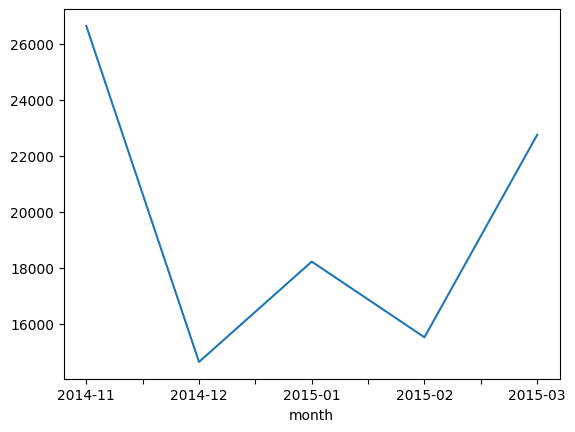

In [ ]:
# 월별 통시간의 합을 구해 그래프로 나타내기
df_phone.groupby('month')['duration'].sum().plot()

<Axes: xlabel='month'>

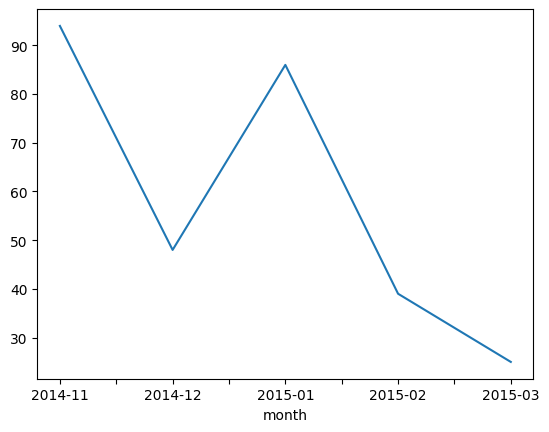

In [ ]:
# item이 sms인 데이터의 month별 전화통화량의 합계
df_phone[df_phone['item']=='sms'].groupby('month')['duration'].sum().plot()

<Axes: xlabel='month'>

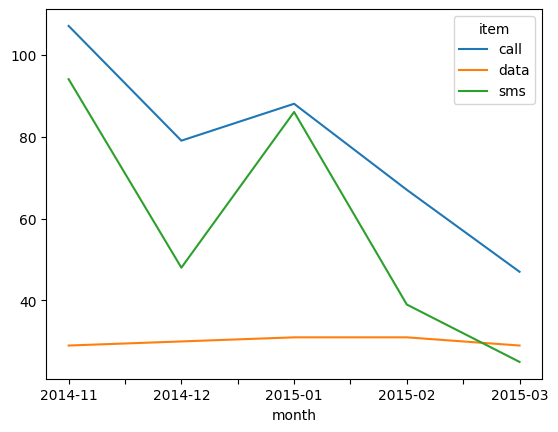

In [ ]:
# month와 item별로 duration의count 뽑아내기
df_phone.groupby(['month','item'])['duration'].count().unstack().plot()

In [ ]:
# aggregation
# as_index = False: month를 index로 사용하지 않음.
# duration column에 sum함수를 적용하라는 뜻.
df_phone.groupby('month', as_index=False).agg({'duration':'sum'})
#df_phone.groupby('month').agg({'duration':'sum'}).reset_index()

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [ ]:
# 각 column들에 다양한 함수를 적용
# first는 먼저 나온 값을 반환
df_phone.groupby(['month', 'item']).agg({'duration':sum, 'network_type':'count', 'date':'first'})

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

In [ ]:
grouped = df_phone.groupby('month').agg({'duration':[min, max, np.mean]})

In [ ]:
# column rename
grouped.rename(
    columns = {'min': 'min_duration', 'max': 'max_duration', 'mean':'mean_duration'}
)

duration                           
        min_duration max_duration mean_duration
month                                          
2014-11          1.0       1940.0    115.823657
2014-12          1.0       2120.0     93.260318
2015-01          1.0       1859.0     88.894141
2015-02          1.0       1863.0    113.301453
2015-03          1.0      10528.0    225.251891

In [ ]:
grouped.columns = grouped.columns.droplevel(level=0)
grouped

,min,max,mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


In [ ]:
# add.prefix()
# coluumn이 앞에 지정한 prefix를 다 붙임
grouped.add_prefix('duration_')

,duration_min,duration_max,duration_mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


#### **pivot table**

In [ ]:
df_phone.pivot_table(
    values = ['duration'],
    index = [df_phone.month, df_phone.item],
    columns = df_phone.network,
    aggfunc='sum',
    fill_value=0
)

#groupby로 하기
#df_phone.groupy(['month','item','network']).agg({'duration':'sum'})

duration                                                   \
network        Meteor Tesco  Three Vodafone      data landline special   
month   item                                                             
2014-11 call     1521  4045  12458     4316     0.000     2906       0   
        data        0     0      0        0   998.441        0       0   
        sms        10     3     25       55     0.000        0       1   
2014-12 call     2010  1819   6316     1302     0.000     1424       0   
        data        0     0      0        0  1032.870        0       0   
        sms        12     1     13       18     0.000        0       0   
2015-01 call     2207  2904   6445     3626     0.000     1603       0   
        data        0     0      0        0  1067.299        0       0   
        sms        10     3     33       40     0.000        0       0   
2015-02 call     1188  4087   6279     1864     0.000      730       0   
        data        0     0      0        0  1067.299        0       0   
        sms         1     2     11       23     0.000        0       2   
2015-03 call      274   973   4966     3513     0.000    11770       0   
        data        0     0      0        0   998.441        0       0   
        sms         0     4      5       13     0.000        0       0   

                              
network      voicemail world  
month   item                  
2014-11 call       301     0  
        data         0     0  
        sms          0     0  
2014-12 call       690     0  
        data         0     0  
        sms          0     4  
2015-01 call       285     0  
        data         0     0  
        sms          0     0  
2015-02 call       268     0  
        data         0     0  
        sms          0     0  
2015-03 call       231     0  
        data         0     0  
        sms          0     3

#### **Crosstab**
- Network data(A,B의 상관관계)를 표현할 때 편하다

In [ ]:
data = {'Product': ['사과', '오렌지', '바나나', '사과', '바나나', '바나나'],
        '판매원': ['존', '존', '클레어', '클레어', '존', '클레어'],
        '단위': [5, 3, 8, 7, 2, 4]}
df = pd.DataFrame(data)

# 판매원이 Product들을 얼마나 팔았는지 알려주는 코드
table = pd.crosstab(index = df.판매원, columns = df.Product, values = df.단위, aggfunc='sum').fillna(0)
#groupby로 하기
# df.groupby(['판매원','Product']).agg({'단위':'sum'}).unstack()

#pivot table로 하기
# df.pivot_table(
#    values = ['단위'],
#    index = df.판매원,
#    columns = df.Product,
#    aggfunc='sum',
#    fill_value=0
# )
table

Product,바나나,사과,오렌지
판매원,,,
존,2.0,5.0,3.0
클레어,12.0,7.0,0.0


#### **merge**
-  기준점이 되는 column을 기준으로 데이터를 합친다

In [ ]:
raw_data = {
    'subject_id': ['1','2','3','4','5','7','8','9','10','11'],
    'test_score': [51,15,15,61,16,14,15,1,61,16]
}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'test_score'])
df_a

,subject_id,test_score
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [ ]:
raw_data={
    'subject_id': ['4','5','6','7','8'],
    'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
    'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']
}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [ ]:
# 각 dataframe에 같은 column값이 있을 경우
pd.merge(df_a, df_b, on = 'subject_id')

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


In [ ]:
# 만약 각 dataframe에 같은 column 값이 없을 경우
pd.merge(df_a, df_b, left_on='subject_id', right_on='subject_id')

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


#### **join**

In [ ]:
raw_data = {
    'subject_id': ['1','2','3','4','5'],
    'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
    'last_name': ['Anderson', 'Ackerman', 'Ail', 'Aoni', 'Atiches']
}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ail
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [ ]:
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [ ]:
# inner join
pd.merge(df_a, df_b, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [ ]:
# left inner join
pd.merge(df_a, df_b, on='subject_id', how='left')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ail,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black


In [ ]:
# right inner join
pd.merge(df_a, df_b, on='subject_id', how='right')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black
2,6,NaN,NaN,Bran,Balwner
3,7,NaN,NaN,Bryce,Brice
4,8,NaN,NaN,Betty,Btisan


In [ ]:
# outer(full) join
pd.merge(df_a, df_b, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ail,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


In [ ]:
# index based join
pd.merge(df_a, df_b, right_index=True, left_index=True)

,subject_id_x,first_name_x,last_name_x,subject_id_y,first_name_y,last_name_y
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ail,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


#### **concat**
- list 형태로 값을 붙임

In [ ]:
# 각 dataframe의 column값이 모두 동일하다.
df_new = pd.concat([df_a, df_b])
df_new.reset_index(drop=True)
#df_a.append(df_b)

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ail
3,4,Alice,Aoni
4,5,Ayoung,Atiches
5,4,Billy,Bonder
6,5,Brian,Black
7,6,Bran,Balwner
8,7,Bryce,Brice
9,8,Betty,Btisan


In [ ]:
# axis=1로 지정
df_new = pd.concat([df_a, df_b], axis=1)
df_new.reset_index(drop=True)

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ail,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan
